This notebook contains exercises related to Capstone Project 1.

Instacart data structure:
   - orders: list of all orders in the dataset. 1 row per order, includes day of the week and time of the day;
   - order_products train: which products (product_id) were ordered; in which order products were added to the cart, and if the product is re-order (1) or not (0);
   - contain the names of products with their corresponding product_id;
   - order_products prior: the structure is the same as order_product_train.csv;
   - aisles contains the aisles;
   - departments: contains the department names.

In [20]:
# We import the needed packages.
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import csv

In [21]:
# Strings to replace names of files run in online environment.
str_isles = 'aisles.csv'
str_dept = 'departments.csv'
str_prod = 'products.csv'
str_prod_train = 'order_products_train.csv'
str_prod_prior = 'order_products_prior.csv'
str_orders = 'orders.csv'

In [22]:
# Strings for local machine runs
str_isles = 'data/aisles.csv'
str_dept = 'data/departments.csv'
str_prod = 'data/products.csv'
str_prod_train = 'data/order_products_train.csv'
str_prod_prior = 'data/order_products_prior.csv'
str_orders = 'data/orders.csv'

For the isles frame, we change these into categories.

In [23]:
fr_isles = pd.read_csv(str_isles, index_col='aisle_id')
fr_isles['aisle'].astype('category')
fr_isles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 1 to 134
Data columns (total 1 columns):
aisle    134 non-null object
dtypes: object(1)
memory usage: 1.6+ KB


We change the type of the department data to category.

In [24]:
fr_dept = pd.read_csv(str_dept, index_col='department_id')
fr_dept.department.astype('category')
fr_dept.head()

,department
department_id,
1,frozen
2,other
3,bakery
4,produce
5,alcohol


In [25]:

fr_prod = pd.read_csv(str_prod, index_col='product_id')
fr_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49688 entries, 1 to 49688
Data columns (total 3 columns):
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


In [26]:
fr_p_train = pd.read_csv(str_prod_train, index_col='order_id')
fr_p_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384617 entries, 1 to 3421070
Data columns (total 3 columns):
product_id           1384617 non-null int64
add_to_cart_order    1384617 non-null int64
reordered            1384617 non-null int64
dtypes: int64(3)
memory usage: 42.3 MB


In [27]:
fp_p_read = pd.read_csv(str_prod_prior, nrows=5000000, index_col = ['order_id', 'product_id'])
fp_p_prior = pd.DataFrame(fp_p_read)
fp_p_prior.info()
%del fp_p_read

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5000000 entries, (2, 33120) to (527768, 21137)
Data columns (total 2 columns):
add_to_cart_order    int64
reordered            int64
dtypes: int64(2)
memory usage: 118.6 MB


UsageError: Line magic function `%del` not found.


We change eval_set to category. The column has only three values.

In [28]:
fp_orders = pd.read_csv(str_orders, index_col='order_id')
fp_orders.eval_set.astype('category')
fp_orders.head(2)

,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,
2539329,1,prior,1,2,8,NaN
2398795,1,prior,2,3,7,15.0


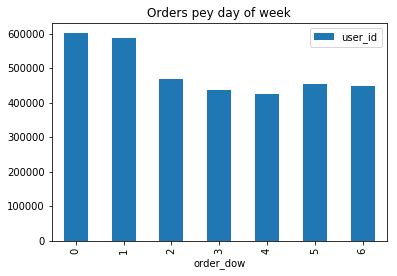

In [29]:
fp_groupped = fp_orders.groupby('order_dow').count().plot(kind='bar',y='user_id', title='Orders pey day of week')



We check to see data in hourly categories.

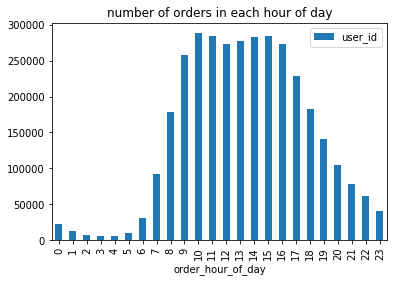

In [30]:
#graphing dayly activities per hour.
fp_orders.groupby('order_hour_of_day').count().plot(kind='bar', y='user_id', title='number of orders in each hour of day')

 We visualize data for inspection.
 
 We see that all orders for 30 days or more are aggregated into a single column.

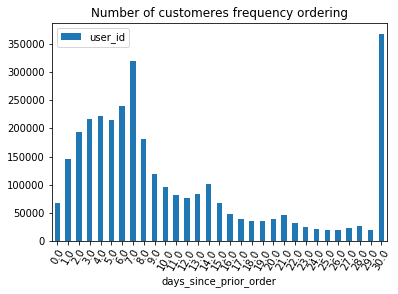

In [31]:
#grouping ordres according to days since prior order
fp_orders.groupby('days_since_prior_order').count().plot(kind='bar', rot=60
                                                         , y='user_id', title='Number of customeres frequency ordering')

We cannot work on pattern where the days are 30 or more, because all orders are aggregated. We are separating these orders from set.

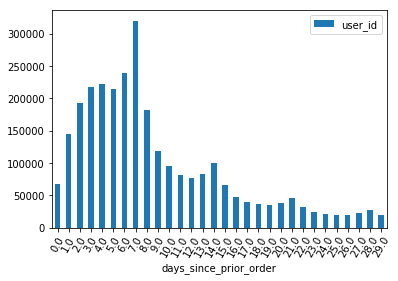

In [32]:
# dropping all observation where days since prior order is 30.
fp_orders_29 = fp_orders.loc[fp_orders['days_since_prior_order'] < 30]
fp_orders_30 = fp_orders.loc[fp_orders['days_since_prior_order']>=30]
fp_orders_29.groupby('days_since_prior_order').count().plot(kind='bar',rot=60, y='user_id')

We save orders in two separate files for further processing: orders_29.csv and orders_30.csv. 

The first file contains all data for orders that are reordes 29 days or less after a prior order. 

The other file contains all orders that are 30 days or more after the previous order.

In [33]:
# saving the separated data in two files for processing
# orders_29.csv and orders_30.csv
fp_orders_29.to_csv('orders_29.csv')
fp_orders_30.to_csv('orders_30.csv')


We investigate relationship between days sinse prior order and number of items purchased. We use trunkated file, because 30 days is an agregate that contains 30 or more days.

In [34]:
str_orders = 'orders_p29.csv'
orders_p29 = pd.read_csv(str_orders, index_col='order_id')
orders_p29.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2702528 entries, 2398795 to 2977660
Data columns (total 5 columns):
user_id                   int64
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(4)
memory usage: 123.7 MB


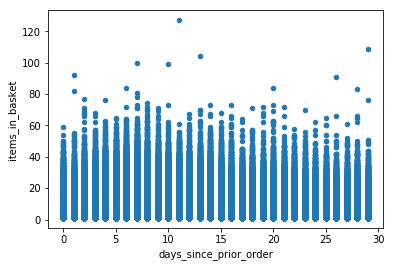

In [35]:
last_item = fp_p_prior.groupby('order_id').count()['add_to_cart_order']
orders_p29['items_in_basket'] = last_item
orders_p29.plot(kind='scatter', x='days_since_prior_order', y='items_in_basket')

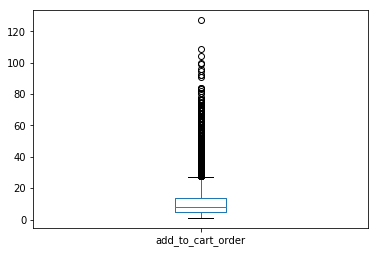

In [52]:
# distribution of how many items in basket. Skewed right.
last_item.plot(kind='box')

In [37]:
orders_p29.describe()['items_in_basket']

count    416923.000000
mean         10.095022
std           7.481146
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: items_in_basket, dtype: float64

In [38]:
high_orders = orders_p29.loc[(orders_p29['items_in_basket'] > 30)]
high_orders.tail()


,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,items_in_basket
order_id,,,,,,
310583,206086,7,4,15,10.0,36.0
131726,206126,14,0,8,29.0,31.0
168787,206165,21,6,1,2.0,42.0
93952,206165,22,5,21,13.0,40.0
341493,206165,24,6,19,6.0,33.0


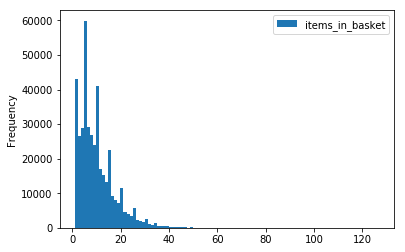

In [39]:
# distribution of number of items in a basket for all orders made prior to 30 days.
orders_p29.plot(kind='hist', y='items_in_basket', bins=100)

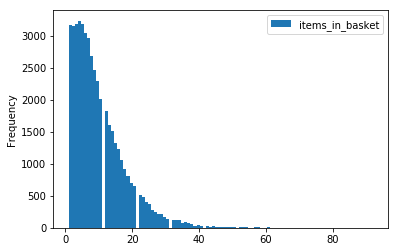

In [40]:
# distribution of number of items ordered when order comes no less than 30 days after prior order. 
str_orders = 'orders_p30.csv'
orders_p30 = pd.read_csv(str_orders, index_col='order_id')
orders_p30['items_in_basket'] = last_item
orders_p30.plot(kind='hist', y='items_in_basket',bins=100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42353 entries, 144358 to 85132
Data columns (total 6 columns):
user_id                   42353 non-null int64
order_number              42353 non-null int64
order_dow                 42353 non-null int64
order_hour_of_day         42353 non-null int64
days_since_prior_order    42353 non-null float64
items_in_basket           42353 non-null float64
dtypes: float64(2), int64(4)
memory usage: 2.3 MB


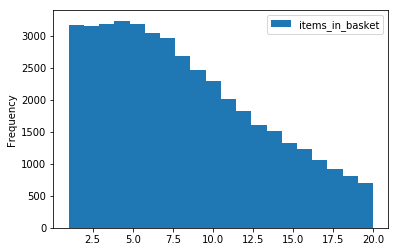

In [41]:
# low orders 30 distribution
low_orders = orders_p30.loc[ (orders_p30['items_in_basket'] < 21)]
low_orders.plot(kind='hist', y='items_in_basket',bins=20)
low_orders.info()

The frequency distribution table below confirms there are no gaps in distribution as shown above.

In [42]:
# check frequency distribution from main graph above.
# remove # to see output.
freq_dist = pd.Series(orders_p30['items_in_basket'])
#freq_dist.value_counts(ascending = True) 

In [43]:
# grouping orders per user.
# we may need the full set of rows from order-product-prior. 
orders_p = pd.read_csv('orders_p.csv')
orders_p['items_in_basket'] = last_item
# %whos

In [44]:
# ???
group_byuser = orders_p.groupby('user_id')['items_in_basket']


In [45]:
# most common orders
most_products = fp_p_prior.groupby('product_id').count()['reordered']
most_reorders = fp_p_prior.groupby('product_id').sum()['reordered']

most_products = pd.merge(left=most_products, right=most_reorders, left_on='product_id', right_on='product_id')
most_products = pd.merge(left=fr_prod['product_name'], right=most_products, left_on='product_id', right_on='product_id')

most_products.sort_values('reordered_x', inplace=True, ascending=False)
most_products.head(30)

,product_name,reordered_x,reordered_y
product_id,,,
24852,Banana,72987,61564
13176,Bag of Organic Bananas,58404,48505
21137,Organic Strawberries,40927,31898
21903,Organic Baby Spinach,37177,28693
47209,Organic Hass Avocado,32817,26024
47766,Organic Avocado,27038,20481
47626,Large Lemon,23682,16463
16797,Strawberries,22055,15364
26209,Limes,21644,14648


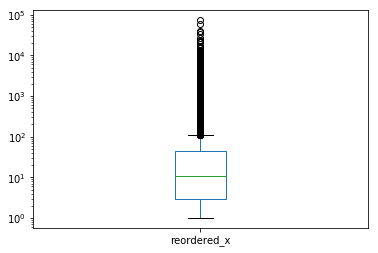

In [51]:
# most ordered products box plot
most_products.plot(kind='box', y='reordered_x', logy=True) # most commonly ordered products

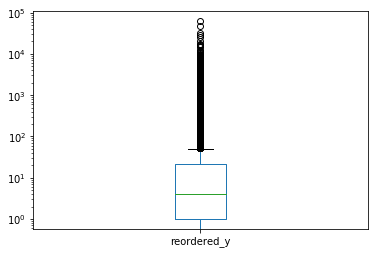

In [53]:
# most reordered products
most_products.plot(kind='box', y='reordered_y', logy=True)

In [47]:
# which product was ordered first
ordered_first = fp_p_prior.loc[fp_p_prior.add_to_cart_order==1]
ordered_first.head()

,,add_to_cart_order,reordered
order_id,product_id,,
2,33120,1,1
3,33754,1,1
4,46842,1,0
5,13176,1,1
6,40462,1,0


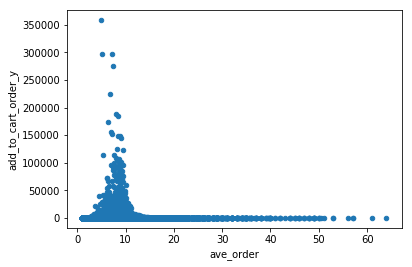

In [48]:
# are more frequent items ordered first?
# number of times an item is ordered, sorted
frequency_count = fp_p_prior.groupby('product_id').count()['add_to_cart_order'].sort_values(ascending=False)
# summing add_to_cart_order to find average order value
sum_add_to_order = fp_p_prior.groupby('product_id')['add_to_cart_order'].sum()

# merging the two data frames.
frequency_count = pd.merge(left=frequency_count, right=sum_add_to_order, left_on='product_id', right_on='product_id')
# new column - ave_order to show when on average in the list the item is ordered.
frequency_count['ave_order'] = frequency_count['add_to_cart_order_y'] / frequency_count['add_to_cart_order_x']

# plotting the ave_order.
frequency_count.plot(kind='scatter', y='add_to_cart_order_y', x='ave_order')

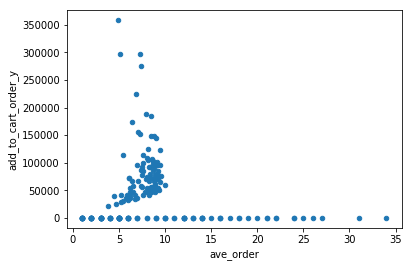

In [49]:
# plotting the top 50 and bottom 50 items from the graph above.
freq_top = frequency_count.head(100)
freq_bot = frequency_count.tail(100)

# concatenating top and bottom parts to plot together.
freq = pd.concat([freq_top, freq_bot], axis=0)
freq.plot(kind='scatter', y='add_to_cart_order_y', x='ave_order')